In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [2]:
path=r'C:\Users\30694\Documents\Υλικό\Biomed\data.xlsm'
data=pd.read_excel(path, index_col=0)
data

,Blood Glucose (mg/dl),Sensor Glucose Readings(mg/dl)
Time (min),,
1,122.743957,121
2,122.743957,121
3,122.743957,121
4,122.743957,121
5,122.743957,121
...,...,...
5037,149.222188,154
5038,148.693423,153
5039,148.165936,152


In [18]:
def mard_coef(y_ground,y_sensor):
    #MARD
    mard=np.mean(np.abs(y_ground-y_sensor)/y_ground)*100
    #Correlation coefficient using numpy
    coeff=np.corrcoef(y_ground,y_sensor)
    print('Mean absolute relative distance is : {}%'.format(round(mard,3)))
    print('Correlation coefficient between the Glucose and the sensor readings is :', coeff[0,1], '\n')

For Blood Glucose values between 60.609 mg/dl and 69.992 mg/dl :
Mean absolute relative distance is : 6.978%
Correlation coefficient between the Glucose and the sensor readings is : 0.6665762433927276 



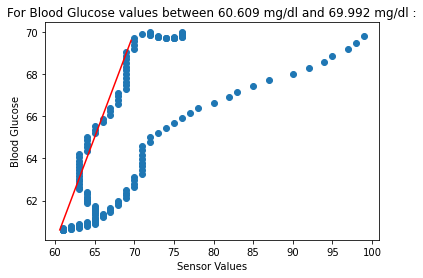

For Blood Glucose values between 70.035 mg/dl and 179.962 mg/dl :
Mean absolute relative distance is : 9.48%
Correlation coefficient between the Glucose and the sensor readings is : 0.9066791694973899 



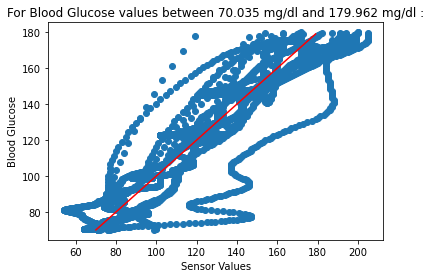

For Blood Glucose values between 180.009 mg/dl and 387.232 mg/dl :
Mean absolute relative distance is : 6.53%
Correlation coefficient between the Glucose and the sensor readings is : 0.8993815576281389 



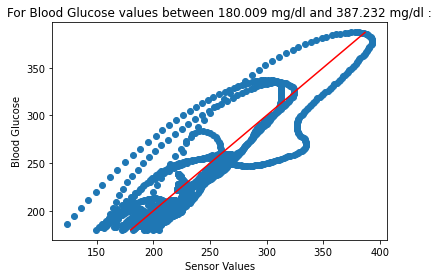

In [23]:
for i in [data[data['Blood Glucose (mg/dl)']<70], data[data['Blood Glucose (mg/dl)'].between(70,180)],
          data[data['Blood Glucose (mg/dl)']>180]]:
    y_ground=i
    y_sensor=y_ground['Sensor Glucose Readings(mg/dl)']
    y_ground=y_ground['Blood Glucose (mg/dl)']
    print('For Blood Glucose values between {} mg/dl and {} mg/dl :'.format(round(min(y_ground),3),round(max(y_ground),3)))
    mard_coef(y_ground,y_sensor)
    plt.figure()
    plt.scatter(y_sensor,y_ground)
    plt.plot(np.arange(min(y_ground),max(y_ground)),np.arange(min(y_ground),max(y_ground)), 'r')
    plt.xlabel('Sensor Values')
    plt.ylabel('Blood Glucose')
    plt.title('For Blood Glucose values between {} mg/dl and {} mg/dl :'.format(round(min(y_ground),3),round(max(y_ground),3)))
    plt.show()

In [5]:
##We can also compute Correlation coefficient without using numpy
c1=y_sensor-np.mean(y_sensor)
c2=y_ground-np.mean(y_ground)

r=np.sum(c1*c2)/(np.sqrt((np.sum(c1**2))*(np.sum(c2**2))))
print('For Blood Glucose values between 180.009 mg/dl and 387.232 mg/dl :\n','Correlation coefficient :',r)

For Blood Glucose values between 180.009 mg/dl and 387.232 mg/dl :
 Correlation coefficient : 0.8993815576281391


In [6]:
data=data.assign(Hypoglycemia=(data['Blood Glucose (mg/dl)']<70).astype('int32'))
data=data.assign(Predicted_Hypoglycemia=(data['Sensor Glucose Readings(mg/dl)']<70).astype('int32'))
data=data.assign(Hyperglycemia=(data['Blood Glucose (mg/dl)']>180).astype('int32'))
data=data.assign(Predicted_Hyperglycemia=(data['Sensor Glucose Readings(mg/dl)']>180).astype('int32'))
data

,Blood Glucose (mg/dl),Sensor Glucose Readings(mg/dl),Hypoglycemia,Predicted_Hypoglycemia,Hyperglycemia,Predicted_Hyperglycemia
Time (min),,,,,,
1,122.743957,121,0,0,0,0
2,122.743957,121,0,0,0,0
3,122.743957,121,0,0,0,0
4,122.743957,121,0,0,0,0
5,122.743957,121,0,0,0,0
...,...,...,...,...,...,...
5037,149.222188,154,0,0,0,0
5038,148.693423,153,0,0,0,0
5039,148.165936,152,0,0,0,0


In [7]:
y_hypoglycemia_true=data['Hypoglycemia']
y_hypoglycemia_pred=data['Predicted_Hypoglycemia']
y_hyperglycemia_true=data['Hyperglycemia']
y_hyperglycemia_pred=data['Predicted_Hyperglycemia']

In [8]:
#ROC analysis
def roc_analysis(y_true,y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_true,y_pred,pos_label=1)
    print('True positive rate for each threshold :', tpr)
    metrics.RocCurveDisplay.from_predictions(y_true,y_pred)
    plt.show()

In [9]:
def extract_metrics(y_true,y_pred):
    #Confusion Matrix
    cm=metrics.confusion_matrix(y_true,y_pred)
    print('Confusion Matrix :\n',cm)
    #Sensitivity
    print('Sensitivity : ',cm[1,1]/(cm[1,1]+cm[1,0]))
    #Specificity
    print('Specificity : ',cm[0,0]/(cm[0,0]+cm[0,1]))
    #PPV
    print("Positive Predictive Values :", cm[1,1]/(cm[1,1]+cm[0,1]))
    #NPV
    print("Negative Predictive Values :", cm[0,0]/(cm[0,0]+cm[1,0]))
    #Accuracy
    print('Accuracy :', (cm[0,0]+cm[1,1])/np.sum(cm))

True positive rate for each threshold : [0.         0.61490683 1.        ]


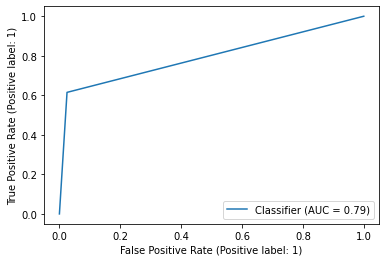

In [10]:
roc_analysis(y_hypoglycemia_true,y_hypoglycemia_pred)

In [11]:
extract_metrics(y_hypoglycemia_true,y_hypoglycemia_pred)

Confusion Matrix :
 [[4758  122]
 [  62   99]]
Sensitivity :  0.6149068322981367
Specificity :  0.975
Positive Predictive Values : 0.4479638009049774
Negative Predictive Values : 0.987136929460581
Accuracy : 0.9634993056933148


True positive rate for each threshold : [0.         0.94621639 1.        ]


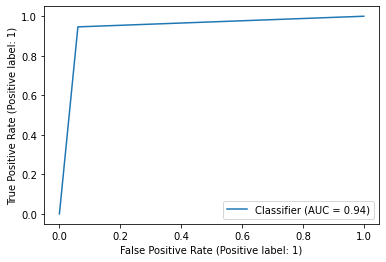

In [12]:
roc_analysis(y_hyperglycemia_true,y_hyperglycemia_pred)

In [13]:
extract_metrics(y_hyperglycemia_true,y_hyperglycemia_pred)

Confusion Matrix :
 [[3233  209]
 [  86 1513]]
Sensitivity :  0.9462163852407754
Specificity :  0.9392794886693783
Positive Predictive Values : 0.8786295005807201
Negative Predictive Values : 0.9740885808978608
Accuracy : 0.9414798651061297
